<a href="https://colab.research.google.com/github/Mubasshir-Ali/Deep_Learning_Practice/blob/master/29_NLP_Tweaking_The_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweaking The Model

# Import TensorFlow And Related Functions

In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Get The Dataset
We're going to use a dataset containing Amazon and Yelp reviews, with their related sentiment (1 for positive, 0 for negative).

In [0]:
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2020-05-07 19:31:50--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 172.217.160.14, 2404:6800:4003:804::200e
Connecting to drive.google.com (drive.google.com)|172.217.160.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jldek55k7pqsubcgv0lc7q4in1f0lp9g/1588879875000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-05-07 19:31:50--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jldek55k7pqsubcgv0lc7q4in1f0lp9g/1588879875000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 74.125.68.132, 2404:6800:4003:c02::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|74.125.68.132|:443

In [0]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0: training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0: training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

# Tokenize The Dataset
Tokenize the dataset, including padding and OOV

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<oov>"

In [0]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<oov>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, 
                       truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, 
                               padding = padding_type, truncating = trunc_type)


# Train A Basic Sentiment Model (With Tweaks!)

In [0]:
model = tf.keras.Sequential([
   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length), 
   tf.keras.layers.GlobalAveragePooling1D(), 
   tf.keras.layers.Dense(6, activation  = 'relu'), 
   tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs = num_epochs, validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2551 - accuracy: 0.8989 - val_loss: 0.4999 - val_accuracy: 0.7469
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2480 - accuracy: 0.9052 - val_loss: 0.4854 - val_accuracy: 0.7870
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2465 - accuracy: 0.9021 - val_loss: 0.5002 - val_accuracy: 0.7494
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2387 - accuracy: 0.9052 - val_loss: 0.5168 - val_accuracy: 0.7368
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.9071 - val_loss: 0.5016 - val_accuracy: 0.7594
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2293 - accuracy: 0.9071 - val_loss: 0.5135 - val_accuracy: 0.7444
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2253 - accuracy: 0.9140 - val_loss: 0.5167 - val_accuracy: 0.7444
Epoch 8/30
50/50 [==

# Visualize The Training Graph
You can use the code below to visualize the training and validation accuracy while you try out different tweaks to the hyperparameters and model.

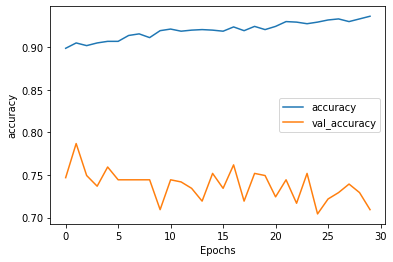

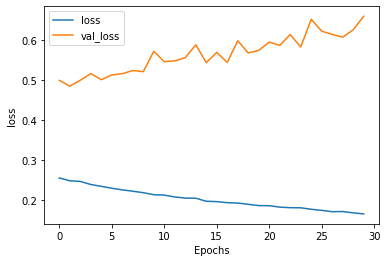

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' +string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' +string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Get Files For Visualizing The Network
The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the checkbox to "sphereize" the data.

Note: You may run into errors with the projection if your vocab_size earlier was larger than the actual number of words in the vocabulary, in which case you'll need to decrease this variable and re-train in order to visualize.

In [0]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [0]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write('\t' .join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

# Predicting Sentiment In New Reviews
Now that you've trained and visualized your network, take a look below at how we can predict sentiment in new reviews the network has never seen before.

In [0]:
# Use the model to predict a review
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews)

# Create the sequences
padding_type = 'post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding = padding_type, maxlen = max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.9906266]


I hate spaghetti
[0.03815347]


Everything was cold
[0.74950784]


Everything was hot exactly as I wanted
[0.47767907]


Everything was green
[0.74950784]


the host seated us immediately
[0.8487887]


they gave us free chocolate cake
[0.9901338]


not sure about the wilted flowers on the table
[0.02178165]


only works when I stand on tippy toes
[0.99076676]


does not work when I stand on my head
[0.00596704]


